# Homework 5: Hypothesis Testing

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Reading: Chapter [10](https://www.inferentialthinking.com/chapters/10/testing-hypotheses.html).

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw05.ok')
_ = ok.auth(inline=True)

ModuleNotFoundError: No module named 'client'

**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [2]:
_ = ok.submit()

NameError: name 'ok' is not defined

## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins \$9 from the casino if it comes up heads and loses \$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [3]:
p_winning_after_two_flips = 1/4
p_winning_after_two_flips

0.25

In [4]:
_ = ok.grade('q1_1')

NameError: name 'ok' is not defined

A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation.

**Null hypothesis:** The customer does not chet. The difference with the usual chance of winning care caused by randomness.

**Alternative hypothesis:** The cuestomer cheats. The chance of winning are not caused by randomeness and can be higher than the usual chance of winning.

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test?

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a list of numbers corresponding to these test statistics.

In [5]:
reasonable_test_statistics = [3,4,6]
reasonable_test_statistics

[3, 4, 6]

In [6]:
_ = ok.grade('q1_3')

NameError: name 'ok' is not defined

**Question 4.** Write a function called `simulate`.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin.

In [8]:
sampling_table = ...

def simulate():
    propor = sample_proportions(20, make_array(0.5,0.5))
    return propor.item(0)*20
simulate()

9.0

In [9]:
_ = ok.grade('q1_4')

NameError: name 'ok' is not defined

**Question 5.** Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 20 games.

In [11]:
test_statistics_under_null = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    number_wins = simulate()
    test_statistics_under_null = np.append(test_statistics_under_null, number_wins)
test_statistics_under_null

array([  9.,   9.,  11., ...,   8.,   9.,  15.])

**Question 6.** Compute an empirical P-value for this test.

In [12]:
p_value = np.count_nonzero(test_statistics_under_null >= 13)/10000
p_value

0.1299

In [ ]:
_ = ok.grade('q1_6')

**Question 7.** Suppose you use a P-value cutoff of 1%, following the arbitrary conventions of hypothesis testing.  What do you conclude?

We will accept the null hypothesis. The player does not not cheating and his results are controlled randomly.

**Question 8.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? Explain.

Neither. p-value shows the absolute difference between the actual results and the expected results.

**Question 9.** Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? Explain.

Neither. We accept when p-value is greater than 1% or reject the null hypothesis when p value is less than 1%.

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

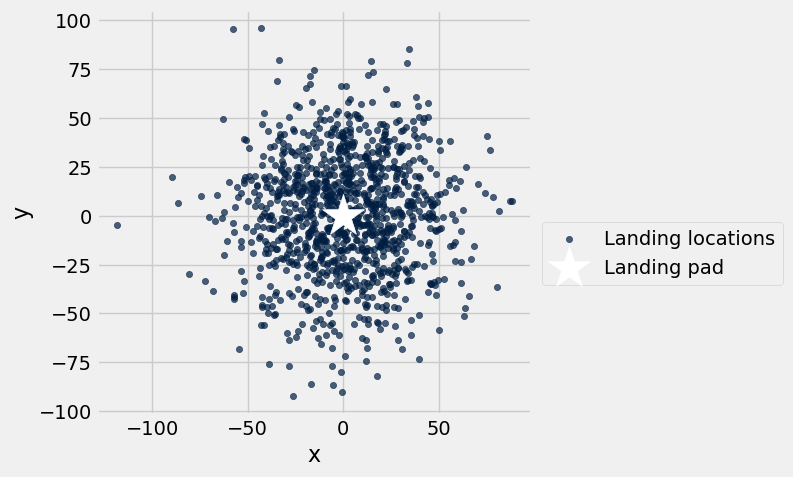

In [13]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

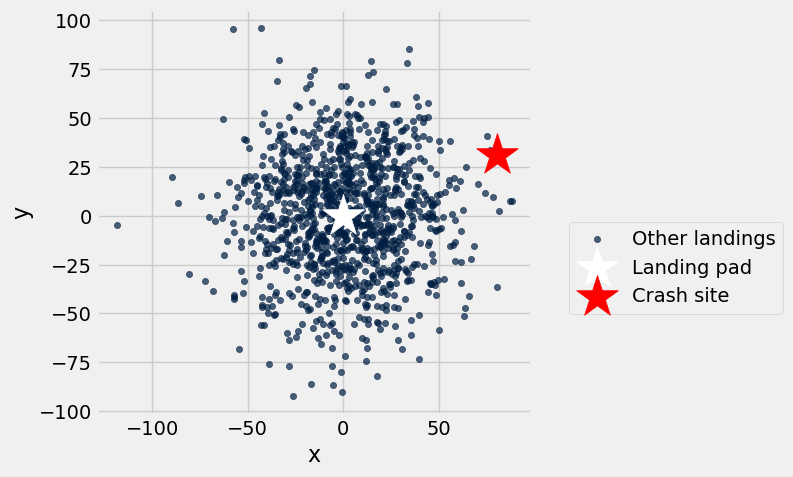

In [14]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.** Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** Not special. Eventhing is caued by randomness, and the location is same as the other landing locations were drawn.

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

**Question 2.** Describe a good test statistic.

**Test statistic:** The key here is whether the null is true. So the good test statisticcs here is that if the null is ture, it is small. 

**Question 3.** Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [16]:
def landing_test_statistic(x_coordinate, y_coordinate):
    test = make_array(x_coordinate, y_coordinate)
    return abs(((test.item(0)**2) + (test.item(1)**2))**(1/2))
landing_test_statistic(50, 25)

55.90169943749474

In [18]:
_ = ok.grade('q2_3')

NameError: name 'ok' is not defined

**Question 4.** The cell below computes a P-value using your test statistic.  Read the code, and then explain in your own words how it tests the hypothesis without ever calling `sample` or `np.random.choice`.

In [17]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = make_array()
for i in np.arange(ordinary_landing_spots.num_rows):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats >= test_stat) / len(null_stats)
p_value

0.012727272727272728

I think we used the functions that were previously defined. And then, the p valvue is calculated by valuers larger or equal to the data by the total number of points.